<a href="https://colab.research.google.com/github/AlexeyUdod/aml/blob/master/Regions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import platform
if platform.system() == 'Linux':
    path = '/content/drive/My Drive/books/hs/chispa1707/'
    from google.colab import drive
    drive.mount('/content/drive')
else:
    path = ""#"d:\drive\Colab Notebooks\dll\hymenoptera_data\"""

Mounted at /content/drive


In [3]:
data = pd.read_excel(path + 'regions2.xlsx', sheet_name = 1)
data

,Трад.,Агент,Штат,Реко,Агент.1,Регион,Аг-Рег,Шт-Рег
0,-950,ly,eg,1725,wa,eg,Африка Сев.,Египет
1,-925,eg,ps,1727,eg,wm,Египет,Ближний Восток
2,-911,aj,aj,1727,iq,iq,Ирак,Ирак
3,-910,aj,aj,1727,iq,iq,Ирак,Ирак
4,-910,eg,il,1727,eg,wm,Египет,Ближний Восток
...,...,...,...,...,...,...,...,...
38171,1843,uk,in,1843,ui,wl,Британия&Ирландия,Азия Южн.
38172,1843,uk,in,1843,ui,wl,Британия&Ирландия,Азия Южн.
38173,1843,es,fr,1843,pi,fr,Пиренеи,Франция
38174,1843,fr,fr,1843,fr,fr,Франция,Франция


In [4]:
data['conn'] = data['Аг-Рег'] + ' >> ' + data['Шт-Рег']
data['connr'] = data['Шт-Рег'] + ' >> ' + data['Аг-Рег']

data

,Трад.,Агент,Штат,Реко,Агент.1,Регион,Аг-Рег,Шт-Рег,conn,connr
0,-950,ly,eg,1725,wa,eg,Африка Сев.,Египет,Африка Сев. >> Египет,Египет >> Африка Сев.
1,-925,eg,ps,1727,eg,wm,Египет,Ближний Восток,Египет >> Ближний Восток,Ближний Восток >> Египет
2,-911,aj,aj,1727,iq,iq,Ирак,Ирак,Ирак >> Ирак,Ирак >> Ирак
3,-910,aj,aj,1727,iq,iq,Ирак,Ирак,Ирак >> Ирак,Ирак >> Ирак
4,-910,eg,il,1727,eg,wm,Египет,Ближний Восток,Египет >> Ближний Восток,Ближний Восток >> Египет
...,...,...,...,...,...,...,...,...,...,...
38171,1843,uk,in,1843,ui,wl,Британия&Ирландия,Азия Южн.,Британия&Ирландия >> Азия Южн.,Азия Южн. >> Британия&Ирландия
38172,1843,uk,in,1843,ui,wl,Британия&Ирландия,Азия Южн.,Британия&Ирландия >> Азия Южн.,Азия Южн. >> Британия&Ирландия
38173,1843,es,fr,1843,pi,fr,Пиренеи,Франция,Пиренеи >> Франция,Франция >> Пиренеи
38174,1843,fr,fr,1843,fr,fr,Франция,Франция,Франция >> Франция,Франция >> Франция


In [5]:
data[['Аг-Рег','Шт-Рег']]

,Аг-Рег,Шт-Рег
0,Африка Сев.,Египет
1,Египет,Ближний Восток
2,Ирак,Ирак
3,Ирак,Ирак
4,Египет,Ближний Восток
...,...,...
38171,Британия&Ирландия,Азия Южн.
38172,Британия&Ирландия,Азия Южн.
38173,Пиренеи,Франция
38174,Франция,Франция


In [6]:
g = data[(data['Агент.1'] != data['Регион']) & (data['Реко'] < 1826)].groupby('conn')

first = g.min()
first['Шт-Рег'] = first['Шт-Рег'] + ' ' + first['Реко'].astype('int32').astype(str)
first = first.groupby('Аг-Рег').apply(lambda x: ', '.join(x.sort_values(by='Реко')['Шт-Рег']))

near = 1000 / g.count().sort_values(by = 'connr', ascending = False)
near = near[['Агент',	'Трад.']].join(g[['Аг-Рег',	'Шт-Рег']].apply(lambda x: x.head(1)), how = 'left').drop('Трад.', axis=1).reset_index().drop('level_1',axis=1).rename(columns = {'Агент':'dis'}) 
near['Шт-Рег'] = near['Шт-Рег'] + ' ' + near['dis'].astype('int32').astype(str)
near = near.groupby('Аг-Рег').apply(lambda x: ', '.join(x.sort_values(by='dis')['Шт-Рег']))

res = pd.DataFrame({'near':near, 'first':first}).reset_index().rename(columns = {'Аг-Рег':'reg'})

In [7]:
res

,reg,near,first
0,Азия Южн.,"Китай 333, Иран 500, Аравия 1000, Индокитай 10...","Китай 1781, Аравия 1783, Индокитай 1789, Иран ..."
1,Аравия,"Ближний Восток 12, Закавказье 13, Турция 14, И...","Ирак 1738, Ближний Восток 1742, Турция 1763, Е..."
2,Африка Восточная,"Египет 166, Аравия 250, Италия 500, Африка Зап...","Египет 1737, Европа Восточная 1763, Ближний Во..."
3,Африка Западная,"Италия 125, Британия&Ирландия 1000, Европа Зап...","Италия 1817, Египет 1822, Британия&Ирландия 18..."
4,Африка Сев.,"Италия 15, Египет 50, Пиренеи 58, Франция 250,...","Египет 1725, Пиренеи 1740, Европа Южн. 1741, А..."
5,Африка Южн.,Пиренеи 1000,Пиренеи 1809
6,Ближний Восток,"Турция 38, Египет 41, Ирак 83, Рим 125, Европа...","Италия 1735, Ирак 1737, Египет 1739, Иран 1741..."
7,Британия&Ирландия,"Франция 6, Ближний Восток 50, Европа Западная ...","Ближний Восток 1765, Рим 1767, Франция 1774, А..."
8,Германия,"Европа Восточная 9, Франция 16, Европа Сев. 22...","Рим 1768, Италия 1773, Франция 1776, Европа За..."
9,Греция,"Турция 9, Европа Восточная 12, Азия Южн. 27, И...","Турция 1732, Италия 1735, Украина 1738, Кавказ..."


In [8]:
res[res.reg == 'Турция'].near.to_string()

'38    Европа Восточная 2, Греция 5, Европа Южн. 7, И...'

In [9]:
near.index

Index(['Азия Южн.', 'Аравия', 'Африка Восточная', 'Африка Западная',
       'Африка Сев.', 'Африка Южн.', 'Ближний Восток', 'Британия&Ирландия',
       'Германия', 'Греция', 'Европа', 'Европа Восточная', 'Европа Западная',
       'Европа Сев.', 'Европа Центральная', 'Европа Южн.', 'Египет',
       'Закавказье', 'Ирак', 'Иран', 'Италия', 'Кавказ', 'Казахстан', 'Китай',
       'Крым', 'Мексика', 'Монголия', 'Пиренеи', 'Поволжье', 'Приазовье',
       'Прибалтика', 'Рим', 'Россия', 'Россия Сев.-Зап.', 'Россия Центр.',
       'Россия Южн.', 'Сибирь Западная', 'Средняя Азия', 'Турция', 'Украина',
       'Франция', 'Япония'],
      dtype='object', name='Аг-Рег')

In [10]:
near.loc['Египет']


'Ближний Восток 5, Турция 15, Ирак 47, Греция 62, Африка Сев. 76, Италия 166, Европа Восточная 166, Рим 250, Азия Южн. 250, Африка Восточная 333, Закавказье 500, Иран 500, Крым 500, Британия&Ирландия 500, Европа Центральная 1000, Африка Южн. 1000, Аравия 1000, Кавказ 1000, Китай 1000, Поволжье 1000, Европа Южн. 1000'

греция - в району румынии-болгарии

италия - это молдавия

пиринеи не там - скорее всего на балканах

франция не там - хз где


слоеная структура - (египет + ирак),турция, герция, италия, франция, германия

In [11]:
data['Аг-Рег'].unique()

array(['Африка Сев.', 'Египет', 'Ирак', 'Ближний Восток', 'Закавказье',
       'Греция', 'Турция', 'Иран', 'Кавказ', 'Африка Восточная', 'Аравия',
       'Рим', 'Украина', 'Китай', 'Европа Восточная', 'Италия',
       'Средняя Азия', 'Крым', 'Европа Южн.', 'Азия Южн.', 'Франция',
       'Япония', 'Европа Сев.', 'Пиренеи', 'Европа Центральная',
       'Европа Западная', 'Британия&Ирландия', 'Германия', 'Монголия',
       'Россия Южн.', 'Приазовье', 'Сибирь Западная', 'Мексика', 'Европа',
       'Россия Сев.-Зап.', 'Россия Центр.', 'Поволжье', 'Казахстан',
       'Россия', 'Африка Южн.', 'Прибалтика', 'Африка Западная',
       'Индокитай', 'Вест-Индия', 'Америка Центральная',
       'Америка Южн. Восток', 'Америка Южн. Запад', 'США', 'Канада'],
      dtype=object)

No handles with labels found to put in legend.


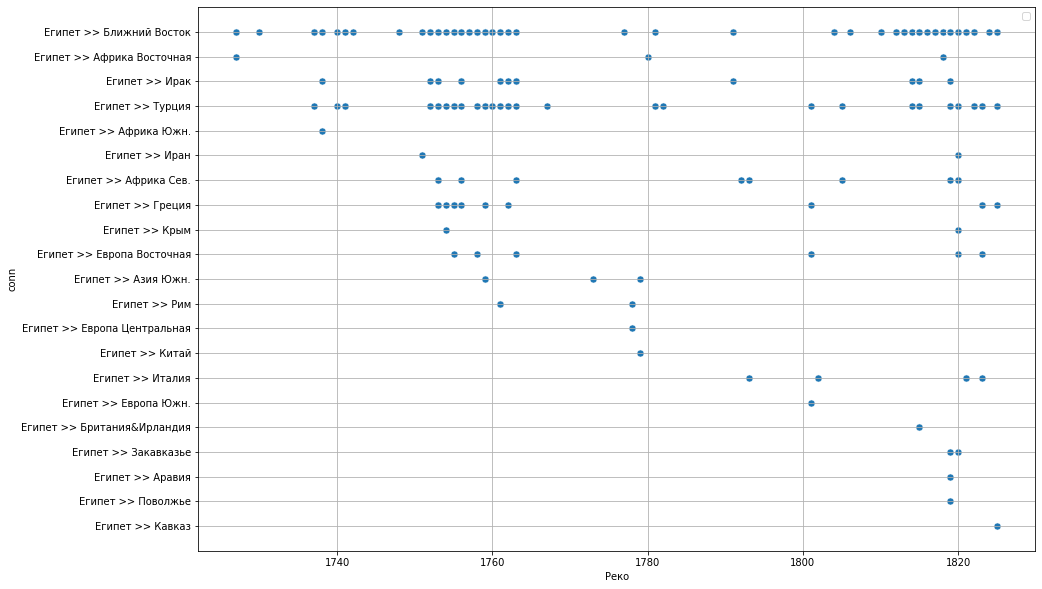

In [12]:
data2 =  data[(data['Агент.1'] != data['Регион']) & (data['Реко'] < 1826) & (data['Аг-Рег'] == 'Египет')]
# sns.scatterplot(x = data2['Трад.'], y = data2.conn,s=20)#, c = data2['Реко'])
sns.scatterplot(x = data2['Реко'], y = data2.conn, s=50)
# sns.violinplot(x = data2['Реко'], y = data2.conn,)
plt.gcf().set_size_inches(15,10)
plt.legend()
plt.grid()

In [14]:
# reg = g.index[5]
# data2 = data[data['Аг-Рег'] == reg]
# sns.scatterplot(x = data['Реко'], y = data['Трад.'], s = 3)
# plt.gcf().set_size_inches(15,10)
# plt.title(reg)


In [ ]:
import torch as tr
import torch.fft as trf
import torch.distributions as trd

In [18]:
data = pd.read_excel(path + '00_База_2020_06_10.xlsx', sheet_name = 0)

In [36]:
data.iloc[14000]
d = data.columns[0]
data2 = data[[d, 'Страна', 'Регион']]


In [75]:
data2['Страна'].unique().shape, data2.shape
data2['country'] = data2['Страна'].str.split(',')
data2['region'] = data2['Регион'].str.split(',')
data3 = data2.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
# data3 = data3.drop(data3[data3.country == data3.region].index, axis=0)
# data3.country = data3.country.apply(lambda x: x[:-1])
# data3.region = data3.region.apply(lambda x: x[:-1])
# data3 = data3.drop([data3.columns[1], data3.columns[2]] , axis=1)
# data3.region
data3 = data3.rename(columns = {data3.columns[0]:'d'})#.iloc[0], data3.iloc[3, 4]

In [104]:
from itertools import combinations 
from itertools import permutations


In [108]:
datacom = data3.country.combine(data3.region, lambda x,y: list(combinations(x+y,2)))
dataper = data3.country.combine(data3.region, lambda x,y: list(permutations(x+y,2)))

In [127]:
datacom_sum = datacom.sum() #.iloc[3]
# dataper.iloc[3], 

In [137]:
datacom_uniq = set(datacom_sum)

In [141]:
len(datacom_uniq)
dic = {com:0 for com in datacom_uniq}
# dic

In [145]:
data3['com'] = datacom
data4 = data3.groupby('d').com.sum()

In [189]:
# data4#
for year in data4.index:
    # print(data4[year])
    for x in set(data4[year]):
        # print(x)
        dic.update({x: dic[x] + 1,})
dic

{('fr', 'mb'): 16,
 ('cy', 'vd'): 2,
 ('ck', 'au'): 1,
 ('pl', 'yu'): 1,
 ('wa', 'wu'): 1,
 ('cy', 'il'): 1,
 ('ge', 'it'): 1,
 ('al', 'rs'): 1,
 ('pt', 'by'): 1,
 ('cn', 'kz'): 3,
 ('fi', 'wa'): 1,
 ('lt', 'ur'): 1,
 ('uk', 'wa'): 9,
 ('ir', 'tj'): 1,
 ('eo', 'vt'): 23,
 ('hr', 'ua'): 4,
 ('fr', 'mx'): 1,
 ('tp', 'pi'): 1,
 ('in', 'ay'): 3,
 ('dv', 'ur'): 1,
 ('my', 'vn'): 1,
 ('bb', 'wz'): 1,
 ('fr', 'ik'): 11,
 ('tr', 'ir'): 2,
 ('at', 'lu'): 1,
 ('us', 'wj'): 2,
 ('fj', 'nz'): 1,
 ('ae', 'we'): 2,
 ('nl', 'pt'): 2,
 ('eg', 'jp'): 5,
 ('id', 'wd'): 2,
 ('vn', 'wn'): 1,
 ('ik', 'wj'): 1,
 ('py', 'br'): 1,
 ('lc', 'wi'): 11,
 ('az', 'ur'): 2,
 ('ro', 'eo'): 339,
 ('am', 'ru'): 2,
 ('py', 'ec'): 1,
 ('fr', 'il'): 1,
 ('mg', 'tz'): 3,
 ('tr', 'ay'): 2,
 ('mq', 'wj'): 2,
 ('in', 'pi'): 3,
 ('ye', 'sa'): 1,
 ('cl', 'gt'): 1,
 ('ru', 'en'): 17,
 ('dk', 'fi'): 2,
 ('za', 'zw'): 4,
 ('de', 'pl'): 43,
 ('pl', 'kv'): 1,
 ('az', 'kv'): 23,
 ('cm', 'gq'): 1,
 ('fi', 'px'): 6,
 ('om', 'wm'): 3,
 

In [194]:
len(dic)
data5 = pd.Series(dic)
data5.sort_values(ascending=False)

(uk, ui)    943
(es, pi)    888
(pl, eo)    861
(va, it)    802
(ru, rz)    775
           ... 
(la, mm)      1
(gy, wk)      1
(au, wk)      1
(ke, ls)      1
x             1
Length: 3705, dtype: int64

In [195]:
data5.to_excel(path + 'connect1.xlsx')